In [1]:
import numpy as np
from scipy import misc
from scipy.ndimage import affine_transform, zoom

from skimage import io, img_as_ubyte, img_as_float
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb, rgba2rgb
from skimage.io import imread, imsave, imshow, show, imshow_collection, imread_collection
from skimage import color, exposure, data
from skimage.util import invert, random_noise, montage
from skimage.transform import SimilarityTransform, warp, swirl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen ### Works only for PIL images
import PIL.ImageStat as stat

## Question 1

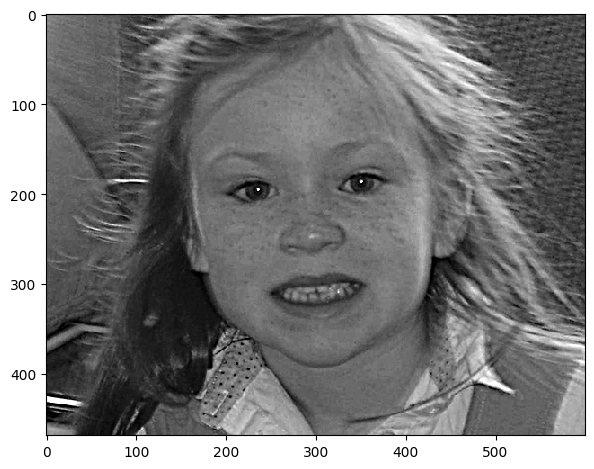

In [2]:
f_girl = imread("data/labA_images/girl.tif")     # . = Current working directory  
imshow(f_girl)                                 # .. parent (Relative directories)

# Question 2.1

In [3]:
lx,ly=f_girl.shape

z_origin = f_girl[0,0]
z_mid = f_girl[lx//2,ly//2]

print("Intensity at origin is:", z_origin)
print("Intensity at center is:", z_mid)

Intensity at origin is: 128
Intensity at center is: 111


## Question 2.2

In [4]:
def scanLine(f,I,loc):
    if loc == "row":
        s = f[I,:]
    if loc == "col":
        s = f[:,I]
    return s


## Question 2.3

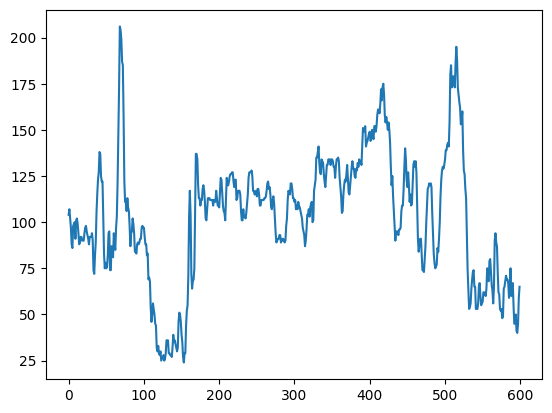

In [5]:
scan = scanLine(f_girl,lx//2,"row")

plt.figure()
plt.plot(np.arange(0,ly),scan)
plt.show()

## Question 2.4

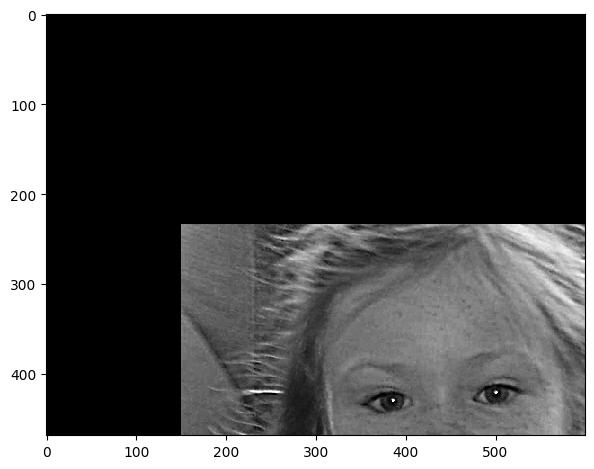

In [6]:
def imageTranslate(f,tx,ty,mode):
    
    a,b = f.shape
    g = np.ones([a,b],dtype='uint8')
    
    if mode == 'black':
        g = g*0
    elif mode == 'white':
        g = g*255
    else:
        print("Mode must be 'black' or 'white'")
        
    for i in range(a):
        if 0<=(i-tx) and (i-tx)<a:
            for j in range(b):
                if 0<=(j-ty) and (j-ty)<b:
                    g[i,j] = f[i-tx,j-ty]
    return g

g_girl = imageTranslate(f_girl,lx//2,ly//4,'black')
imshow(g_girl)

## Question 2.5

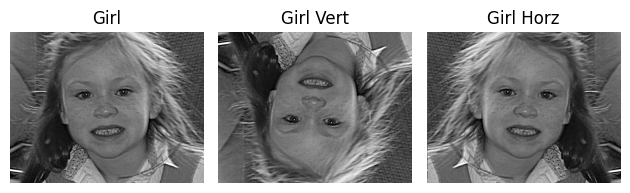

In [7]:
def imageReflect(f, mode):
    
    a,b = f.shape
    g = np.ones([a,b],dtype='uint8')

    for i in range(a):
        for j in range(b):
            if mode == 'vert':
                g[i,j] = f[-i,j]
            elif mode == 'horz':
                g[i,j] = f[i,-j]
            else:
                print("select mode 'horz' or 'vert'")
          
    return g

g_girl_v = imageReflect(f_girl, 'vert')
g_girl_h = imageReflect(f_girl, 'horz')  

fig,axes = plt.subplots(nrows=1, ncols=3)
ax=axes.ravel()
ax[0].imshow(f_girl, cmap=plt.cm.gray)
ax[0].set_title('Girl')

ax[1].imshow(g_girl_v, cmap=plt.cm.gray)
ax[1].set_title('Girl Vert')

ax[2].imshow(g_girl_h, cmap=plt.cm.gray)
ax[2].set_title('Girl Horz')

for a in ax:
    a.axis('off')
    
fig.tight_layout()
plt.show()

In [8]:
## Question 3.a   

Intensity max: 150
Intensity min: 0


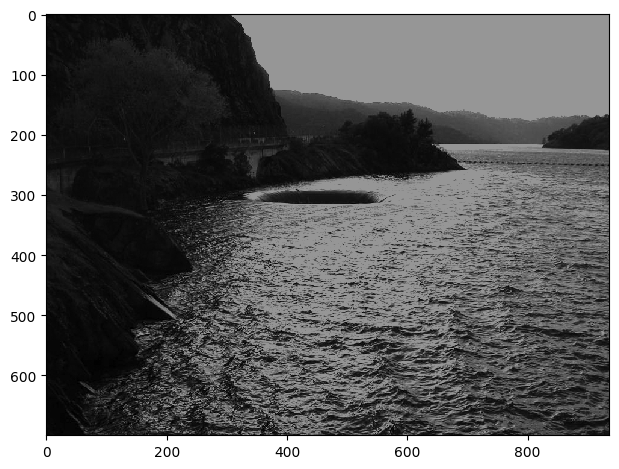

In [9]:
f_spill = imread("data/labA_images/spillway-dark.tif")
imshow(f_spill)

z_max = np.max(f_spill)
z_min = np.min(f_spill)

print("Intensity max:", z_max)
print("Intensity min:", z_min)


## Question 3.b    

In [10]:
K1 = 1
g_spill_k1 = K1*((f_spill-z_min)/z_max)

K255 = 255
g_spill_k255 = K255*((f_spill-z_min)/z_max)

## Question 3.c 

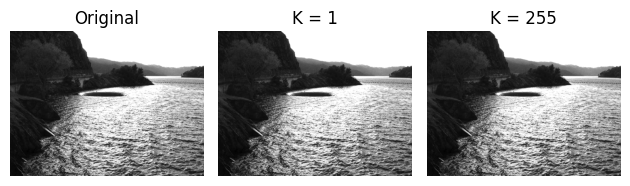

In [11]:
fig,axes = plt.subplots(nrows=1, ncols=3)
ax=axes.ravel()
ax[0].imshow(f_spill, cmap=plt.cm.gray)   ### Python automatically does contrast stretching
ax[0].set_title('Original')

ax[1].imshow(g_spill_k1, cmap=plt.cm.gray)
ax[1].set_title('K = 1')

ax[2].imshow(g_spill_k255, cmap=plt.cm.gray)
ax[2].set_title('K = 255')

for a in ax:
    a.axis('off')
    
fig.tight_layout()
plt.show()

There is no difference in intensities. For image 1 matplotlib automatically does contrast stretching. <br>
For K=1 the image is represented by a floating point number which preserves the information the same across [0,L-1]

## Question 4

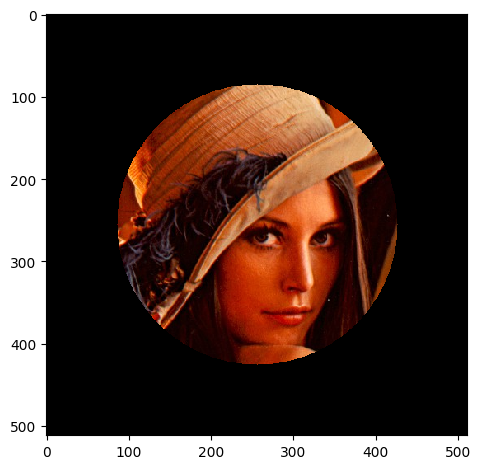

In [12]:
f_lena = imread("data/labA_images/lena-RGB.tif")
lx, ly = f_lena.shape[0:2]

for i in range (lx):
    for j in range(ly):
        if ((lx//2 -i)**2 + (ly//2 -j)**2) > (lx//3)**2:
            f_lena[i,j] = 0 

imshow(f_lena)

## Question 5

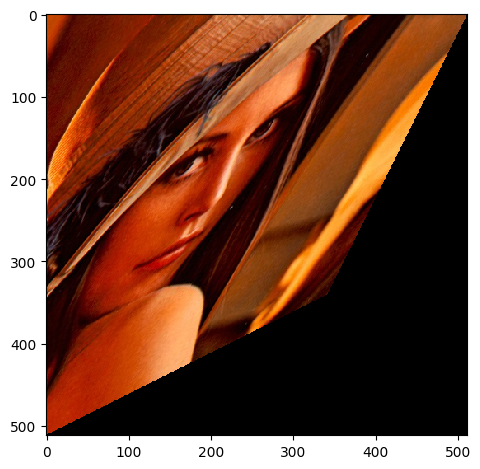

In [13]:
lena_gray = imread("data/labA_images/lena-RGB.tif")
    
lambda1 = 0.5
m_Sh = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
lena_gray_Sh = affine_transform(lena_gray, m_Sh)

imshow(lena_gray_Sh)
plt.show()

## Question 6

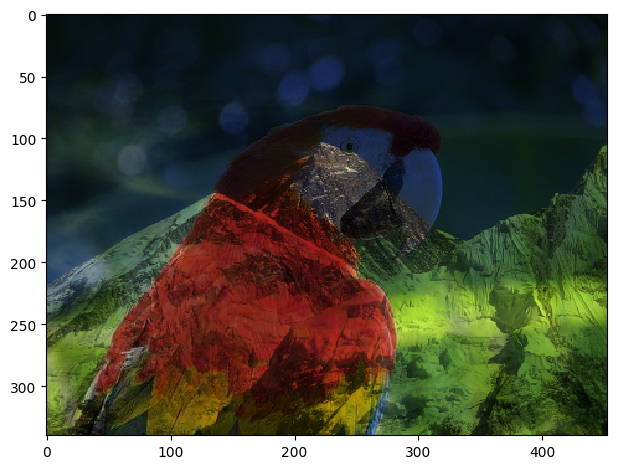

In [14]:
f_parrot = imread("data/labA_images/parrot.jpg")
f_hill = imread("data/labA_images/hill.jpg")

f_parrot = rescale(f_parrot,1)
f_hill_rescaled = rescale(f_hill, 0.453, channel_axis=-1)
f_multi = f_parrot*f_hill_rescaled
imshow(f_multi)

## Question 7  

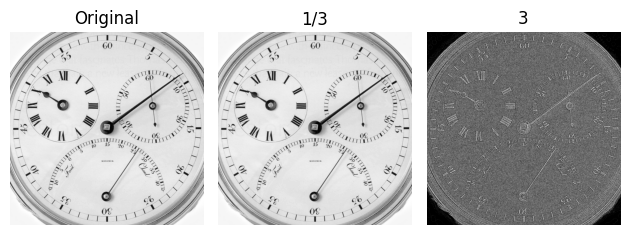

In [15]:
f_chronometer = imread("data/labA_images/chronometer.tif")
g_chronometer = img_as_ubyte(rescale(f_chronometer,1/2))
h_chronometer = img_as_ubyte(rescale(g_chronometer,2))
j_chronometer = f_chronometer - h_chronometer

fig,axes = plt.subplots(nrows=1, ncols=3)
ax=axes.ravel()
ax[0].imshow(f_chronometer, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(g_chronometer, cmap=plt.cm.gray)
ax[1].set_title('1/3')

ax[2].imshow(j_chronometer, cmap=plt.cm.gray)
ax[2].set_title('3')

for a in ax:
    a.axis('off')
    
fig.tight_layout()
plt.show()